**Credit EDA & Credit Score Calculation with Python**

Problem Statement

    >>>To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

In [2875]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2876]:
df = pd.read_csv(r"C:\Users\Chitra\OneDrive\Documents\ScalerNotes\Domain Analytics\Credit Risk Analysis\Credit_score.csv")

In [2877]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [2878]:
df.shape

(100000, 27)

In [2879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [2880]:
df.duplicated().sum()

0

In [2881]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


**DATA CLEANING FOR COLUMNS - ID,CUST_ID,MONTH,AGE,NAME,SSN,OCCUPATION,ANNUAL_INCOME**

In [2883]:
for i in df.columns[:8]:
    print("value counts:")
    print(df[i].value_counts())
    print("nunique:",df[i].nunique())
    print("***"*10)

value counts:
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
nunique: 100000
******************************
value counts:
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
nunique: 12500
******************************
value counts:
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
nunique: 8
******************************
value counts:
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
T

In [2884]:
def clean_data(x):
    if '' in x:
        return str(x).replace('_','')
    else:
        return str(x)

**Age**

In [2886]:
df['Age'].value_counts()

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

In [2887]:
df['Age'] = df['Age'].apply(clean_data).astype(int)

In [2888]:
df['Age'].replace(-500,0,inplace =True)

In [2889]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.min())

In [2890]:
df['Age'].isnull().sum()

0

**SSN**

In [2892]:
df['SSN'].value_counts()

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [2893]:
df['SSN'] = df['SSN'].apply(lambda x: str(x).replace('#F%$D@*&8',''))

In [2894]:
df['SSN'].value_counts()

SSN
               5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [2895]:
df['SSN']= df.groupby('Customer_ID')['SSN'].transform(lambda x: x.mode().iat[0])

**OCCUPATION**

In [2897]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [2898]:
df['Occupation'].replace('_______',np.nan,inplace =True)

In [2899]:
df['Occupation'].isna().sum()

7062

In [2900]:
df['Occupation']= df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode().iat[0])

**ANNUAL_INCOME**

In [2902]:
df['Annual_Income'].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: count, Length: 18940, dtype: int64

In [2903]:
def clean_data(x):
    if '_' in x:
        return np.round(float(str(x).replace('_','')),2)
    else:
        return np.round(float(str(x)),2)

In [2904]:
df['Annual_Income'] =df['Annual_Income'].apply(clean_data)

In [2905]:
df['Annual_Income'].value_counts()

Annual_Income
17816.75       16
9141.63        16
40341.16       16
17273.83       16
9491.02        16
               ..
12484551.00     1
16274888.00     1
21678911.00     1
20639135.00     1
8299495.00      1
Name: count, Length: 13485, dtype: int64

***Insight:***

--> We can see SSN, Occupation and Annual income columns have garbage data or special char included.

**Data Cleaning for columns - Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,
  Delay_from_due_date,Num_of_Delayed_Payment**

In [2909]:
for i in df.columns[8:16]:
    print("value counts:")
    print(df[i].value_counts())
    print("nunique:",df[i].nunique())
    print("***"*10)

value counts:
Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64
nunique: 13235
******************************
value counts:
Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64
nunique: 943
******************************
value counts:
Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64
nunique: 1179
******************************
value counts:
Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120     

In [2910]:
df['Monthly_Inhand_Salary'].isnull().sum()

15002

In [2911]:
df['Monthly_Inhand_Salary'] =df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: np.round(x.mean(),2))

In [2912]:
df['Monthly_Inhand_Salary'].isnull().sum()

0

**Monthly_Inhand_Salary - imputing the null values with mean values from customer id level**

In [2914]:
def clean_data(x):
    if '_' in x:
        return np.round(float(str(x).replace('_','')),2)
    else:
        return np.round(float(str(x)),2)

In [2915]:
df['Monthly_Inhand_Salary'] =df['Monthly_Inhand_Salary'].astype(int)

In [2916]:
df['Num_Bank_Accounts'].isnull().sum()

0

In [2917]:
df['Num_Bank_Accounts'] =df['Num_Bank_Accounts'].astype(int)

In [2918]:
df['Num_Credit_Card'].isnull().sum()

0

In [2919]:
df['Num_Credit_Card'] =df['Num_Credit_Card'].astype(int)

In [2920]:
df['Interest_Rate'].isnull().sum()

0

In [2921]:
df['Interest_Rate'] = df['Interest_Rate'].astype(int)

In [2922]:
df['Interest_Rate']

0           3
1           3
2           3
3           3
4           3
         ... 
99995       7
99996       7
99997    5729
99998       7
99999       7
Name: Interest_Rate, Length: 100000, dtype: int32

In [2923]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(clean_data).astype(int)

In [2924]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: 0 if x<0 else x)

In [2925]:
df['Num_of_Loan'].isnull().sum()

0

In [2926]:
def clean_Type_of_Loan(df):
  if 'and' in str(df):
    return df.replace('and','').strip()
  else:
    return df

In [2927]:
df_tol = df["Type_of_Loan"].apply(clean_Type_of_Loan)

In [2928]:
df["Type_of_Loan"] = df_tol.apply(lambda x: str(x).split(','))

In [2929]:
df["Type_of_Loan"]

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
2        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                          [Auto Loan,   Student Loan]
99996                          [Auto Loan,   Student Loan]
99997                          [Auto Loan,   Student Loan]
99998                          [Auto Loan,   Student Loan]
99999                          [Auto Loan,   Student Loan]
Name: Type_of_Loan, Length: 100000, dtype: object

In [2930]:
df["Type_of_Loan"]= df.groupby('Customer_ID')["Type_of_Loan"].transform(lambda x: np.random.choice(x.mode().iat[0]).strip() 
                                                                       if np.random.choice(x.mode().iat[0])!= 'nan'
                                                                       else np.random.choice(x.mode().iat[0]).replace('nan','missing value'))

In [2931]:
df["Type_of_Loan"].value_counts()

Type_of_Loan
missing value              11408
Credit-Builder Loan        10272
Student Loan               10240
Not Specified              10176
Payday Loan                10080
Debt Consolidation Loan     9808
Mortgage Loan               9696
Personal Loan               9520
Home Equity Loan            9424
Auto Loan                   9376
Name: count, dtype: int64

In [2932]:
df['Delay_from_due_date'].value_counts()

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

In [2933]:
df['Delay_from_due_date'].isnull().sum()

0

In [2934]:
df['Delay_from_due_date'] =  df.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x: np.round(x.mean(),2)).astype(int)

In [2935]:
def clean_data1(x):
    if '-' in x:
        return x.replace('-',np.nan)

In [2936]:
df['Delay_from_due_date']= df['Delay_from_due_date'].transform(lambda x: str(x).replace('-','')).astype('int')

In [2937]:
df['Num_of_Delayed_Payment'].isnull().sum()

7002

In [2938]:
df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64

In [2939]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace('_','') if '_' in str(x) else str(x)).astype(float)

In [2940]:
df['Num_of_Delayed_Payment'].isnull().sum()

7002

In [2941]:
df['Num_of_Delayed_Payment'] =df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: np.round(x.mean(),2))

In [2942]:
df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19.00     1040
12.00      936
17.00      912
16.00      888
11.00      872
          ... 
319.29       8
234.00       8
155.50       8
219.57       8
6.40         8
Name: count, Length: 1228, dtype: int64

In [2943]:
df['Num_of_Delayed_Payment'].isnull().sum()

0

**Insight on Non Graphical Analysis**

1. This dataset contains 100000 rows and 27 columns
2. Performed data cleaning and preprocessing - dataset have 12500 unique Customer ID
3. Most of the columns are numerical and very few are categorical data
4. Performed data cleaning on individual columns for the further Analysis


**Data cleaning for columns - Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,
  Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance**

In [2947]:
for i in df.columns[16:28]:
    print("value counts:")
    print(df[i].value_counts())
    print("nunique:",df[i].nunique())
    print("***"*10)

value counts:
Changed_Credit_Limit
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-5.78       1
30.1        1
35.89       1
-3.67       1
21.17       1
Name: count, Length: 3635, dtype: int64
nunique: 3635
******************************
value counts:
Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64
nunique: 1223
******************************
value counts:
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
nunique: 4
******************************
value counts:
Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64
nunique: 13178
*************

In [2948]:
'''clean_data

Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio, Credit_History_Age,Payment_of_Min_Amount,
Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance'''



'clean_data\n\nChanged_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio, Credit_History_Age,Payment_of_Min_Amount,\nTotal_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance'

In [2949]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-5.78       1
30.1        1
35.89       1
-3.67       1
21.17       1
Name: count, Length: 3635, dtype: int64

In [2950]:
df['Changed_Credit_Limit'] =df['Changed_Credit_Limit'].apply(lambda x: str(x).replace('_','0').strip() if '_' in str(x) else 
                                 (str(x).replace('-','').strip() if '-' in str(x) else str(x))).astype(float)

In [2951]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
0.00     2095
8.22      135
11.50     127
11.32     126
7.35      121
         ... 
20.66       1
32.56       1
31.56       1
31.90       1
21.17       1
Name: count, Length: 3103, dtype: int64

In [2952]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: np.round(x.mean(),2))

In [2953]:
df['Changed_Credit_Limit'].isnull().sum()

0

In [2954]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [2955]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: np.round(x.mean(),2))

In [2956]:
df['Num_Credit_Inquiries'].isnull().sum()

0

In [2957]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [2958]:
df['Credit_Mix'].isnull().sum()

0

In [2959]:
df['Credit_Mix'] =df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mode().iat[0])

In [2960]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45304
Good        30136
Bad         23512
_            1048
Name: count, dtype: int64

In [2961]:
df['Credit_Mix']= df['Credit_Mix'].apply(lambda x: np.random.choice(['Standard','Good','Bad']) if '_' in str(x) else str(x))

In [2962]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45658
Good        30454
Bad         23888
Name: count, dtype: int64

In [2963]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [2964]:
df['Outstanding_Debt'] =df['Outstanding_Debt'].apply(lambda x: str(x).replace('_','').strip() if '_' in str(x) else 
                                 str(x)).astype(float)

In [2965]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [2966]:
df['Outstanding_Debt'].isnull().sum()

0

In [2967]:
df['Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
            ..
38.730069    1
30.017515    1
27.279794    1
27.002436    1
34.192463    1
Name: count, Length: 99998, dtype: int64

In [2968]:
df['Credit_Utilization_Ratio'].isnull().sum()

0

In [2969]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [2970]:
df['Credit_History_Age'].isnull().sum()

9030

In [2971]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.mode().iat[0])

In [2972]:
df['Credit_History_Age'].isnull().sum()

0

In [2973]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [2974]:
df['Payment_of_Min_Amount'].isnull().sum()

0

In [2975]:
df['Total_EMI_per_month'].value_counts()

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64

In [2976]:
df['Total_EMI_per_month'].isnull().sum()

0

In [2977]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
__10000__      4305
0               169
80.41529544       1
36.66235139       1
89.73848936       1
               ... 
36.54190859       1
93.45116319       1
140.8097222       1
38.7393767        1
167.1638652       1
Name: count, Length: 91049, dtype: int64

In [2978]:
def amount_invested_monthly(x):
    if '_' in str(x):
        return str(x).split('_')[2]
    else:
        return str(x)

In [2979]:
df["Amount_invested_monthly"] = np.round(df["Amount_invested_monthly"].apply(amount_invested_monthly).astype(float),2)

In [2980]:
df["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
10000.00    4305
0.00         169
42.58         14
67.88         13
79.38         13
            ... 
336.11         1
576.30         1
337.23         1
390.15         1
167.16         1
Name: count, Length: 38633, dtype: int64

In [2981]:
df["Amount_invested_monthly"].isnull().sum()

4479

In [2982]:
df["Amount_invested_monthly"] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: np.round(x.mean(),2))

In [2983]:
df["Amount_invested_monthly"].isnull().sum()

0

In [2984]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [2985]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

In [2986]:
df['Payment_Behaviour'].isnull().sum()

7600

In [2987]:
df['Payment_Behaviour'] =df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.mode().iat[0])

In [2988]:
df['Payment_Behaviour'].isnull().sum()

0

In [2989]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
312.4940887                         1
604.3402009                         1
                                   ..
280.6862317                         1
366.289038                          1
151.1882696                         1
306.7502785                         1
393.6736956                         1
Name: count, Length: 98790, dtype: int64

In [2990]:
def Monthly_Balance(x):
    if "__" in str(x):
        if '-' in str(x):
            x = str(x).replace('-','')
        return str(x).split("__")[2]
    elif '_' in str(x):
        return str(x).split("_")[2]
    else:
        return str(x)

In [2991]:
df['Monthly_Balance']

0        312.4940887
1        284.6291625
2        331.2098629
3        223.4513097
4         341.489231
            ...     
99995     479.866228
99996      496.65161
99997     516.809083
99998     319.164979
99999     393.673696
Name: Monthly_Balance, Length: 100000, dtype: object

In [2992]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(Monthly_Balance)

In [2993]:
df['Monthly_Balance'].isnull().sum()

0

In [2994]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
nan            1200
                  9
350.0148691       2
695.0571561       2
312.4940887       1
               ... 
280.6862317       1
366.289038        1
151.1882696       1
306.7502785       1
393.6736956       1
Name: count, Length: 98791, dtype: int64

In [2995]:
df['Monthly_Balance']=df['Monthly_Balance'].apply(lambda x: 0 if str(x)=='nan' else (0 if str(x)=='' else x))

In [2996]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
0              1209
350.0148691       2
695.0571561       2
312.4940887       1
347.41389         1
               ... 
280.6862317       1
366.289038        1
151.1882696       1
306.7502785       1
393.6736956       1
Name: count, Length: 98790, dtype: int64

In [2997]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [2998]:
df['Monthly_Balance'] =df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: np.round(x.mean(),2))

In [2999]:
df['Monthly_Balance'].isnull().sum()

0

In [3000]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [3001]:
df.drop(columns =['ID','Name','SSN'],axis = 1,inplace =True)

In [3002]:
cat_col = df.select_dtypes(include='object').columns

In [3003]:
'''cat_col= cat_col.delete(0)'''


'cat_col= cat_col.delete(0)'

In [3004]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

**Insights on Non Graphical Analysis**

	--> Dataset has 148670 rows and 20 columns.
	--> Also we can see few null values in columns - loan_limit,loan_purpose,
	rate_of_interest,Upfront_charges,property_value,income,age and LTV.
	--> Used KNN imputer to impute the null values
	--> contains 10 numerical columns and 10 categorical column.
	--> ID column is completely unique so there is no need of grouping the data
	--> Data available for the year 2019.


**Aggregation of dataset**

In [3008]:
agg_df = df.groupby('Customer_ID').agg({'Month':{'max'},'Age':{'min'},'Occupation':{pd.Series.mode},
                               'Annual_Income':{'min'},
                               'Monthly_Inhand_Salary':{'min'},'Num_Bank_Accounts':{'min'},
                               'Num_Credit_Card':{'min'},'Interest_Rate':{'min'},
                               'Num_of_Loan':{'min'},'Type_of_Loan':{'max'},'Delay_from_due_date':{'min'},
                               'Num_of_Delayed_Payment':{'min'},'Changed_Credit_Limit':{'min'},
                               'Num_Credit_Inquiries':{'min'},
                               'Credit_Mix':{'max'},'Outstanding_Debt':{'min'},'Credit_Utilization_Ratio':{'min'},
                               'Credit_History_Age':{'min'},'Payment_of_Min_Amount':{'min'},
                               'Total_EMI_per_month':{'min'},
                               'Amount_invested_monthly':{'min'},'Payment_Behaviour':{pd.Series.mode},
                               'Monthly_Balance':{'min'}
                              }).reset_index()

In [3009]:
agg_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
,,max,min,mode,min,min,min,min,min,min,...,min,max,min,min,min,min,min,min,mode,min
0,CUS_0x1000,May,17,Lawyer,30625.94,2706,6,5,27,2,...,10.88,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.941090,158.55,High_spent_Medium_value_payments,335.38
1,CUS_0x1009,May,25,Mechanic,52312.68,4250,6,5,17,4,...,3.00,Standard,202.68,23.679534,30 Years and 10 Months,NM,108.366467,146.68,High_spent_Medium_value_payments,428.74
2,CUS_0x100b,May,18,Media_Manager,113781.39,9549,1,4,1,0,...,285.50,Good,1030.20,28.592943,15 Years and 10 Months,NM,0.000000,1861.76,High_spent_Large_value_payments,781.23
3,CUS_0x1011,May,43,Doctor,58918.47,5208,3,3,17,3,...,251.75,Standard,473.14,25.360300,15 Years and 10 Months,NM,123.434939,1522.18,Low_spent_Medium_value_payments,332.64
4,CUS_0x1013,May,43,Mechanic,98620.98,7962,3,3,6,3,...,3.00,Good,1233.51,21.978163,17 Years and 10 Months,NM,228.018084,355.44,High_spent_Medium_value_payments,472.78


In [3010]:
new_col =[]
for i in range(len(agg_df)):
    if i>23:
        break
    else:
        new_col.append(agg_df.columns[i][0])
agg_df.columns = new_col

In [3011]:
agg_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0x1000,May,17,Lawyer,30625.94,2706,6,5,27,2,...,10.88,Bad,1562.91,26.612093,10 Years and 2 Months,Yes,42.941090,158.55,High_spent_Medium_value_payments,335.38
1,CUS_0x1009,May,25,Mechanic,52312.68,4250,6,5,17,4,...,3.00,Standard,202.68,23.679534,30 Years and 10 Months,NM,108.366467,146.68,High_spent_Medium_value_payments,428.74
2,CUS_0x100b,May,18,Media_Manager,113781.39,9549,1,4,1,0,...,285.50,Good,1030.20,28.592943,15 Years and 10 Months,NM,0.000000,1861.76,High_spent_Large_value_payments,781.23
3,CUS_0x1011,May,43,Doctor,58918.47,5208,3,3,17,3,...,251.75,Standard,473.14,25.360300,15 Years and 10 Months,NM,123.434939,1522.18,Low_spent_Medium_value_payments,332.64
4,CUS_0x1013,May,43,Mechanic,98620.98,7962,3,3,6,3,...,3.00,Good,1233.51,21.978163,17 Years and 10 Months,NM,228.018084,355.44,High_spent_Medium_value_payments,472.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,May,55,Scientist,17032.78,1176,0,6,2,3,...,4.25,Good,1229.08,25.402963,16 Years and 10 Months,No,33.299764,83.92,Low_spent_Small_value_payments,271.67
12496,CUS_0xff4,May,0,Entrepreneur,25546.26,2415,8,7,14,5,...,5.00,Standard,758.44,25.413617,18 Years and 2 Months,NM,101.328637,152.78,Low_spent_Small_value_payments,259.98
12497,CUS_0xff6,May,18,Doctor,117639.92,9727,5,6,1,2,...,2.00,Good,338.30,23.631611,24 Years and 10 Months,No,126.638453,1990.20,High_spent_Small_value_payments,583.91
12498,CUS_0xffc,May,17,Musician,60877.17,5218,6,8,27,8,...,12.38,Bad,1300.13,28.896769,12 Years and 10 Months,Yes,272.809169,1386.65,High_spent_Large_value_payments,339.95


In [3012]:
cat_col = agg_df.select_dtypes(include='object').columns

**Insight**

We have done aggregation based on customer id and got 12500 unique rows, 24 cols

In [3015]:
cat_col

Index(['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

**Univariate Analysis**

In [3017]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 10 Months    3488
17 Years and 10 Months    3480
18 Years and 10 Months    3264
19 Years and 10 Months    3224
16 Years and 10 Months    3088
                          ... 
31 Years and 4 Months        8
3 Years and 4 Months         8
23 Years and 6 Months        8
12 Years and 4 Months        8
2 Years and 3 Months         8
Name: count, Length: 249, dtype: int64

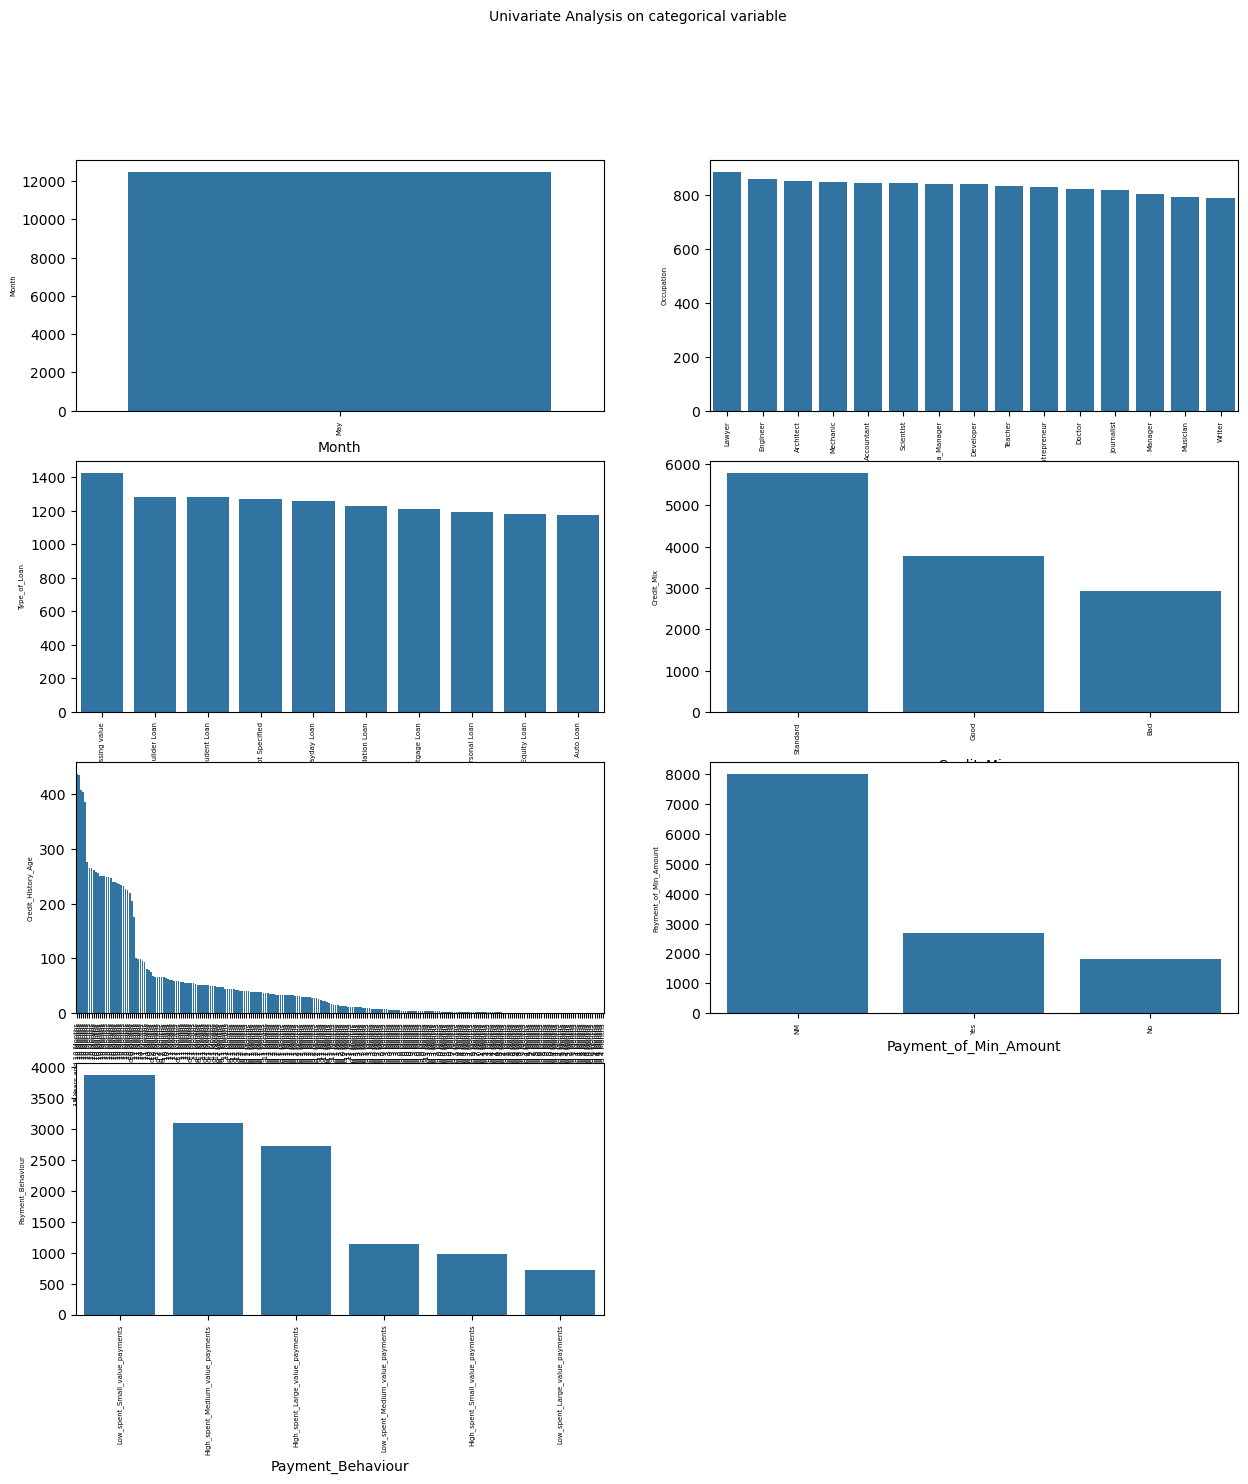

In [3018]:
plt.figure(figsize =(15,15)).suptitle("Univariate Analysis on categorical variable",fontsize = 10)
j =1
for i in cat_col[1:]:
    plt.subplot(4,2,j)
    sns.countplot(x = agg_df[i],order = agg_df[i].value_counts().index)
    plt.xticks(rotation =90,fontsize =5)
    plt.ylabel(i,fontsize =5)
    j+=1
    if j ==len(cat_col):
        break


plt.show()

**INSIGHT**

1. We have got only 1 month since this is agg data
2. Lawyer, Engineer, Architect are the top 3 occupations with highest counts.
3. Student loan, Personal Loan and Payday loan are the top 3 Type of loan.
4. Standard is having the highest count in credit mix
5. Low spend small value is the highest then High spent medium value and High spent large value.

In [3021]:
num_col = agg_df.select_dtypes(include='number').columns

In [3022]:
num_col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

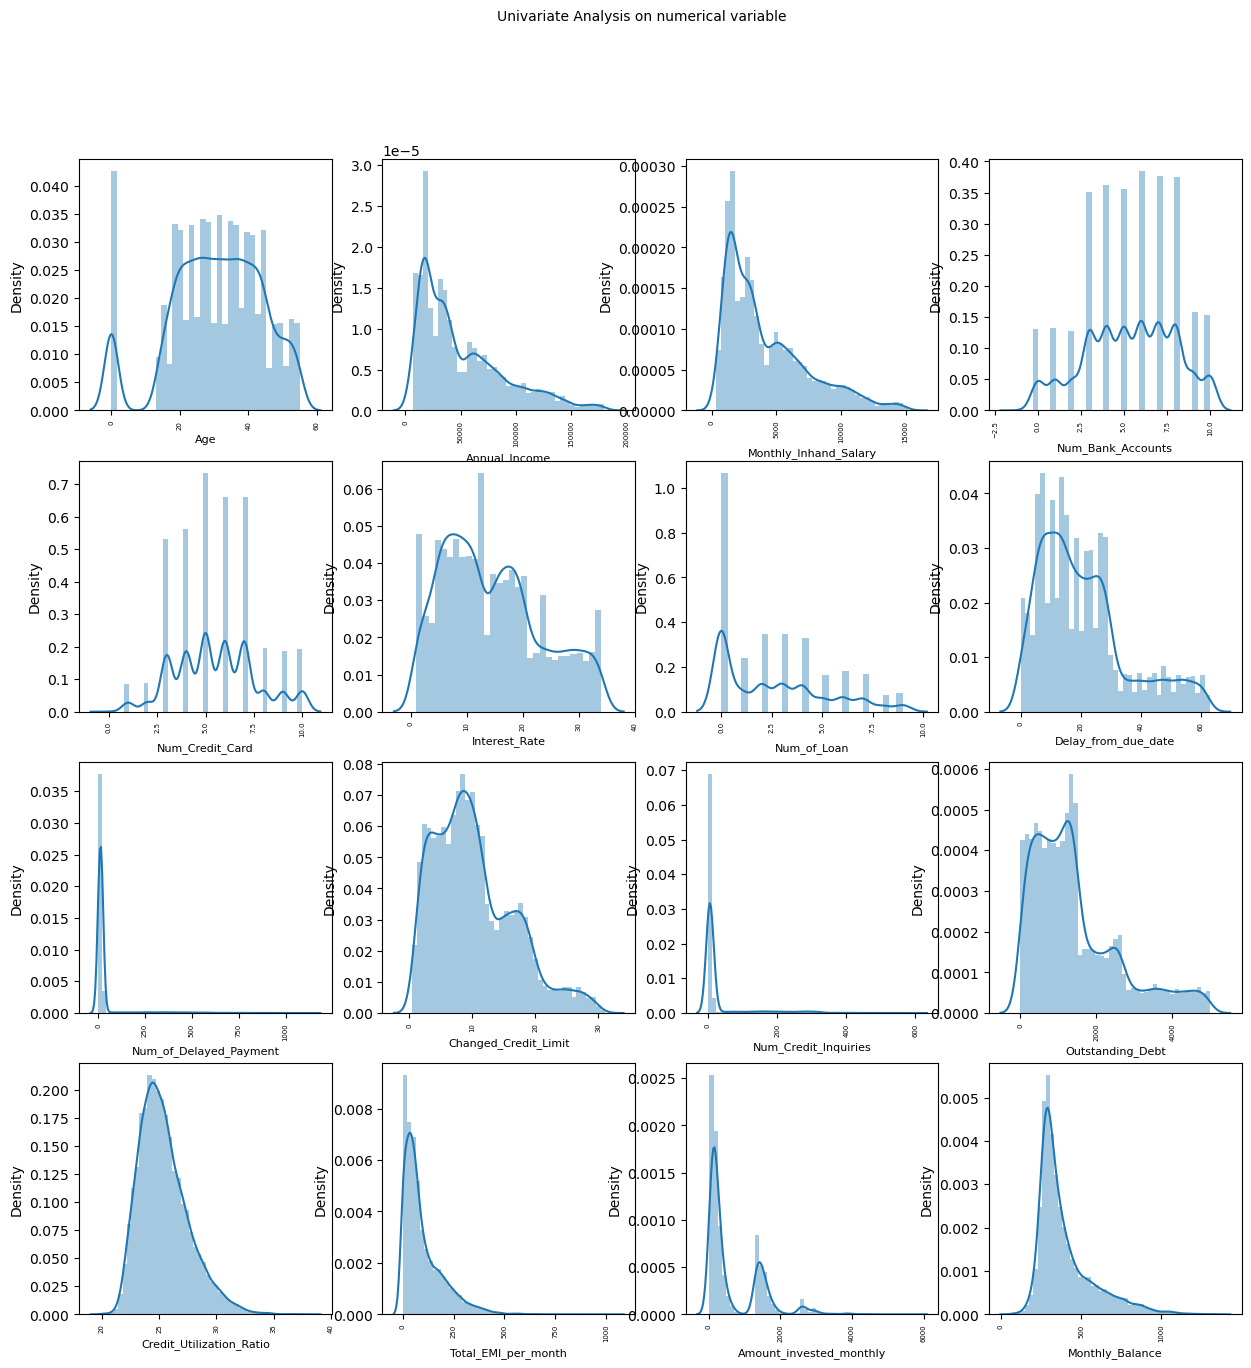

In [3023]:
plt.figure(figsize =(15,15)).suptitle("Univariate Analysis on numerical variable",fontsize = 10)
j =1
for i in num_col:
    plt.subplot(4,4,j)
    sns.distplot(x = agg_df[i])
    plt.xticks(rotation =90,fontsize =5)
    plt.xlabel(i,fontsize =8)
    j+=1
    if j >len(num_col):
        break


plt.show()

**Outlier Detection**

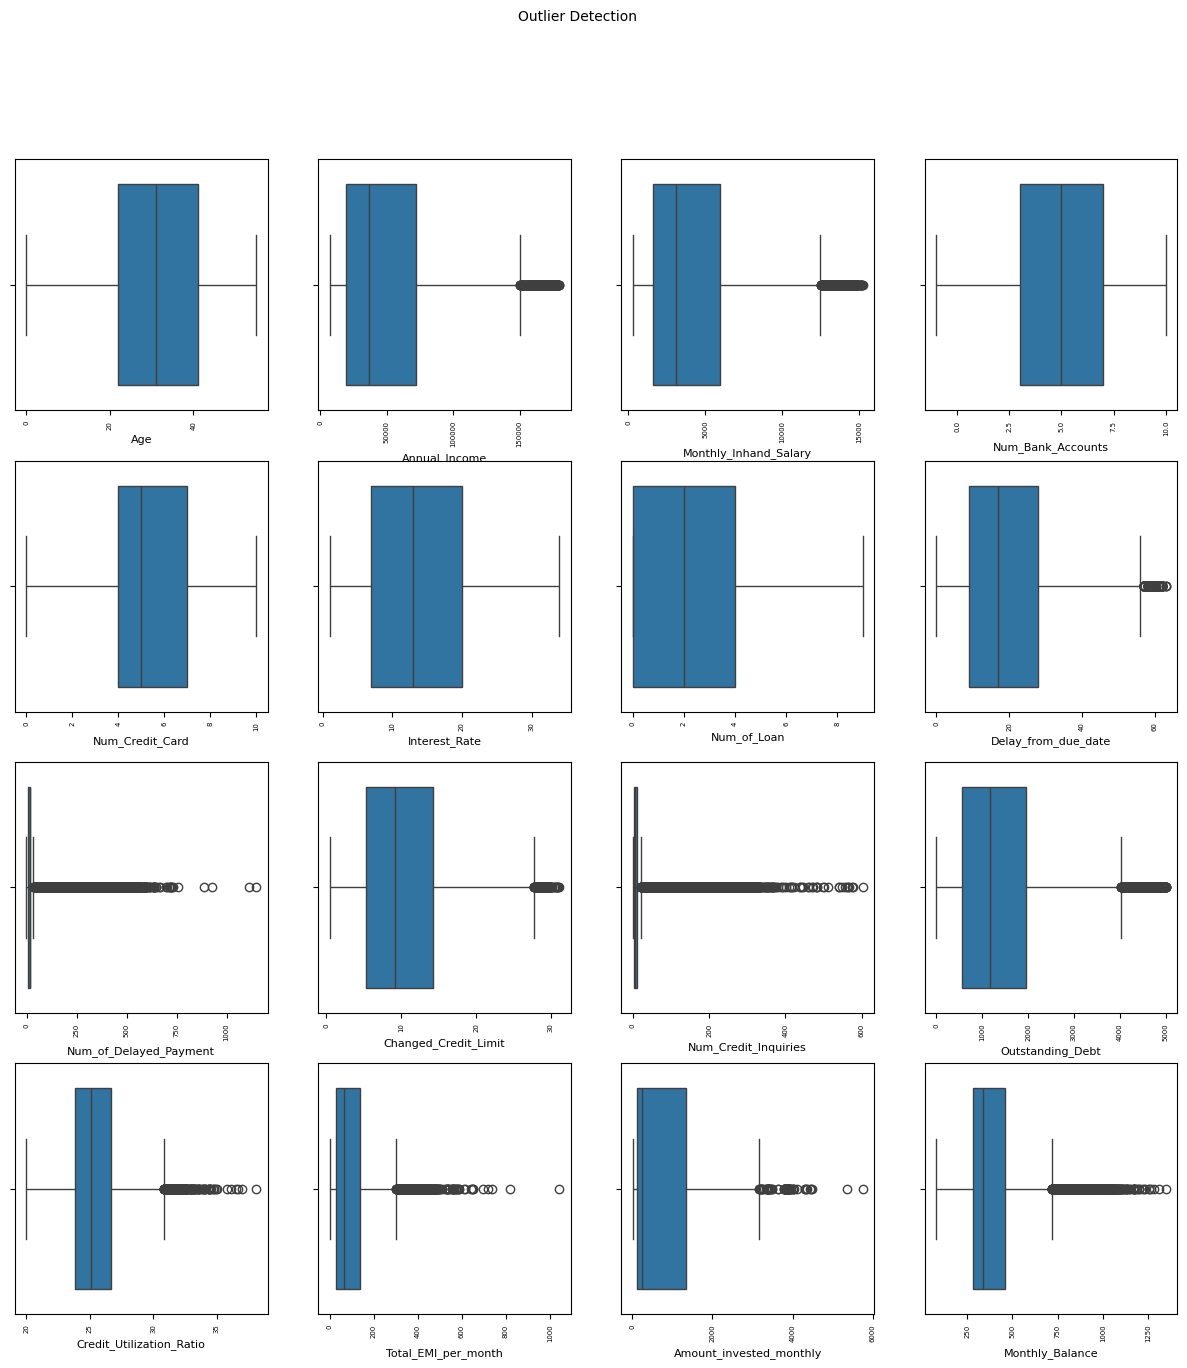

In [3026]:
plt.figure(figsize =(15,15)).suptitle("Outlier Detection",fontsize = 10)
j =1
for i in num_col:
    plt.subplot(4,4,j)
    sns.boxplot(x = agg_df[i])
    plt.xticks(rotation =90,fontsize =5)
    plt.xlabel(i,fontsize =8)
    j+=1
    if j >len(num_col):
        break


plt.show()

In [3027]:
print("Total rows:",len(agg_df))
for i in num_col.tolist():
    print("col:",i)
    q1 = np.round(agg_df[i].quantile(0.25),2)
    q3 = np.round(agg_df[i].quantile(0.75),2)
    iqr = np.round(q3-q1,2)
    print("q1:",q1)
    print("q3:",q3)
    print("IQR:",iqr)
    lower = np.round(q1 - 1.5*iqr,2)
    upper = np.round(q3 + 1.5*iqr,2)
    print('upper:',upper)
    print('lower:',lower)
    print("upper outlier counts-",len(list(np.where(agg_df[i] > upper)[0])))
    print("% of outliers:", (np.round(len(list(np.where(agg_df[i] < lower)[0]))+np.round(len(list(np.where(agg_df[i] > upper)[0])))/len(agg_df),2)))
    print("lower outlier counts-",len(list(np.where(agg_df[i] < lower)[0])))
    print("***"*10)
    

Total rows: 12500
col: Age
q1: 22.0
q3: 41.0
IQR: 19.0
upper: 69.5
lower: -6.5
upper outlier counts- 0
% of outliers: 0.0
lower outlier counts- 0
******************************
col: Annual_Income
q1: 19342.97
q3: 71683.47
IQR: 52340.5
upper: 150194.22
lower: -59167.78
upper outlier counts- 250
% of outliers: 0.02
lower outlier counts- 0
******************************
col: Monthly_Inhand_Salary
q1: 1625.0
q3: 5961.0
IQR: 4336.0
upper: 12465.0
lower: -4879.0
upper outlier counts- 248
% of outliers: 0.02
lower outlier counts- 0
******************************
col: Num_Bank_Accounts
q1: 3.0
q3: 7.0
IQR: 4.0
upper: 13.0
lower: -3.0
upper outlier counts- 0
% of outliers: 0.0
lower outlier counts- 0
******************************
col: Num_Credit_Card
q1: 4.0
q3: 7.0
IQR: 3.0
upper: 11.5
lower: -0.5
upper outlier counts- 0
% of outliers: 0.0
lower outlier counts- 0
******************************
col: Interest_Rate
q1: 7.0
q3: 20.0
IQR: 13.0
upper: 39.5
lower: -12.5
upper outlier counts- 0
% of 

**Insights on Outlier Detection**

--> some Numerical columns like no.of delayed payments, Annual income, Monthly Inhand salary are having outliers

--> Num of Credit Inquiries is having the highest outlier % - 12%

In [3030]:
df_corr = agg_df.select_dtypes(include='number').corr()

<Axes: >

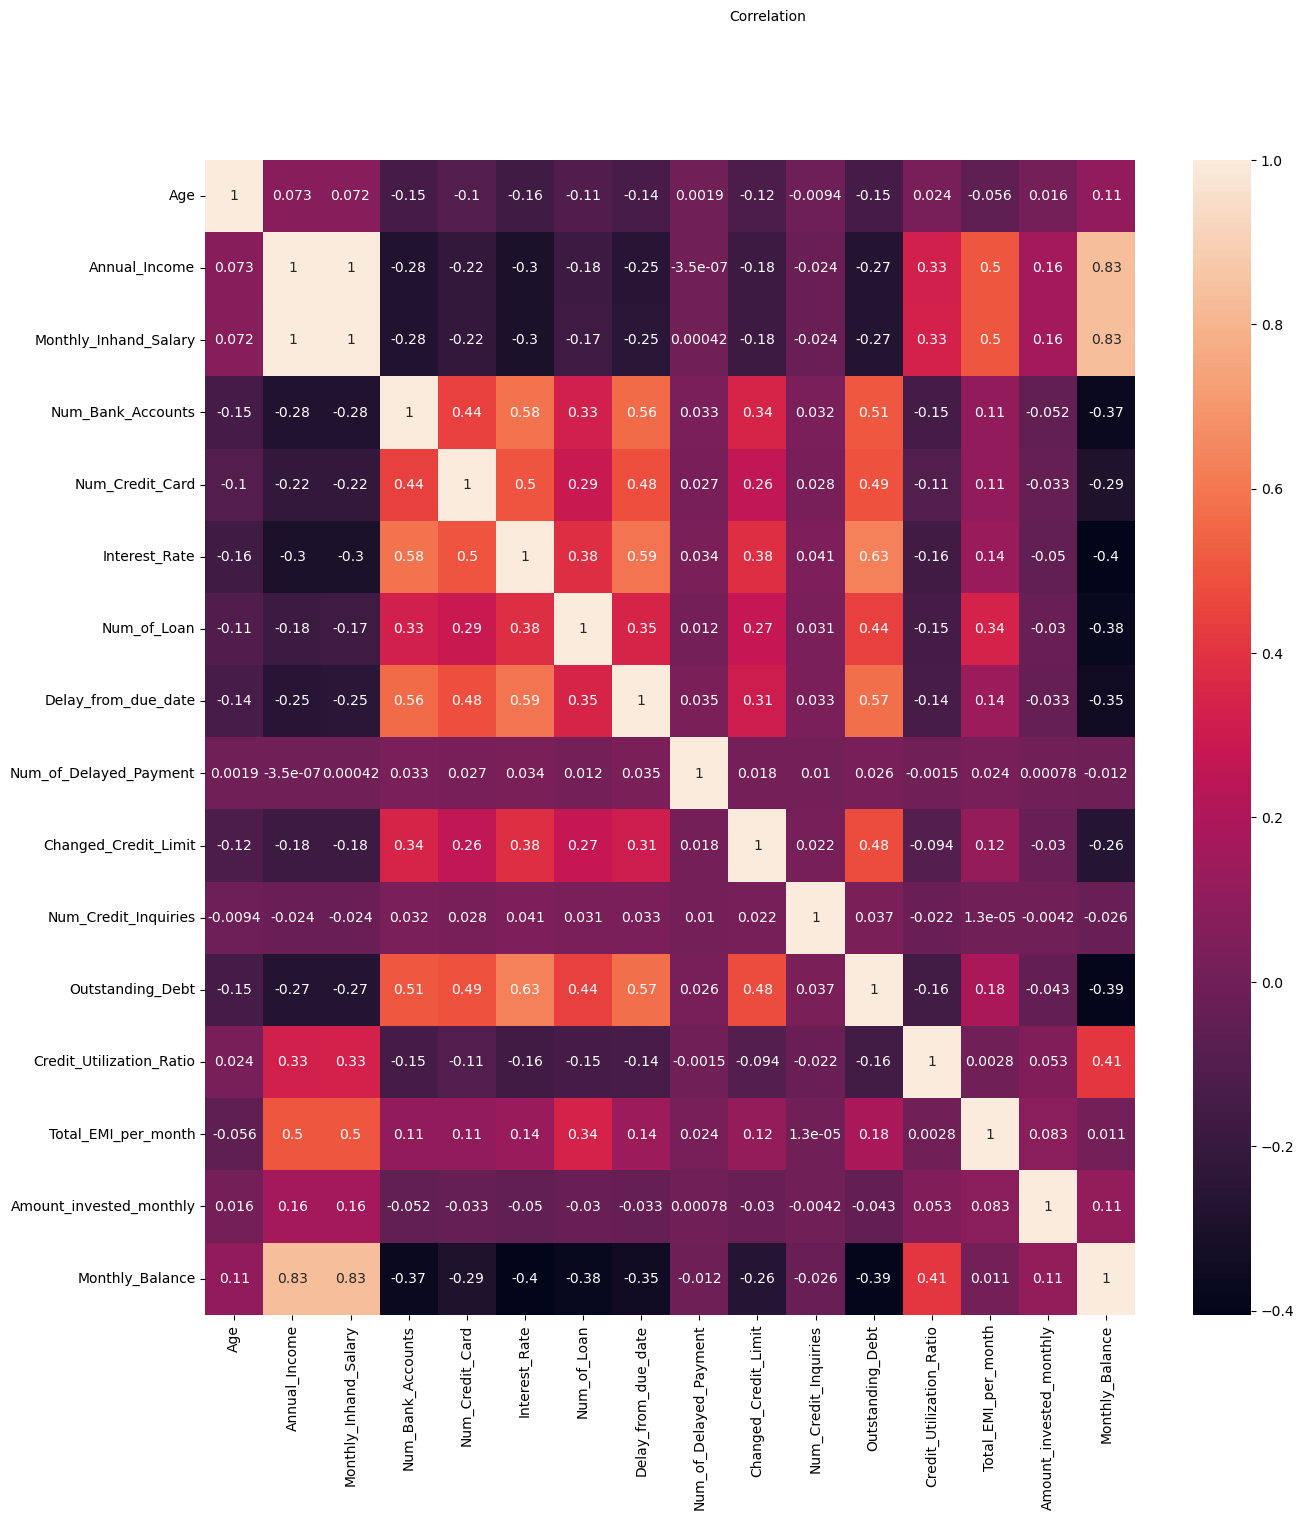

In [3031]:
plt.figure(figsize =(15,15)).suptitle("Correlation",fontsize = 10)
sns.heatmap(df_corr,annot=True)

Insights:

 We can see high to medium correlation among these variables
 
--> Annual income has high correlation with Monthly balance

--> Monthly inhand salary is highly correlated with Monthly balance

--> Interest rate and outstanding debt, delay from due date and outstanding debt are moderatel correlated

**Bivariate Analysis**

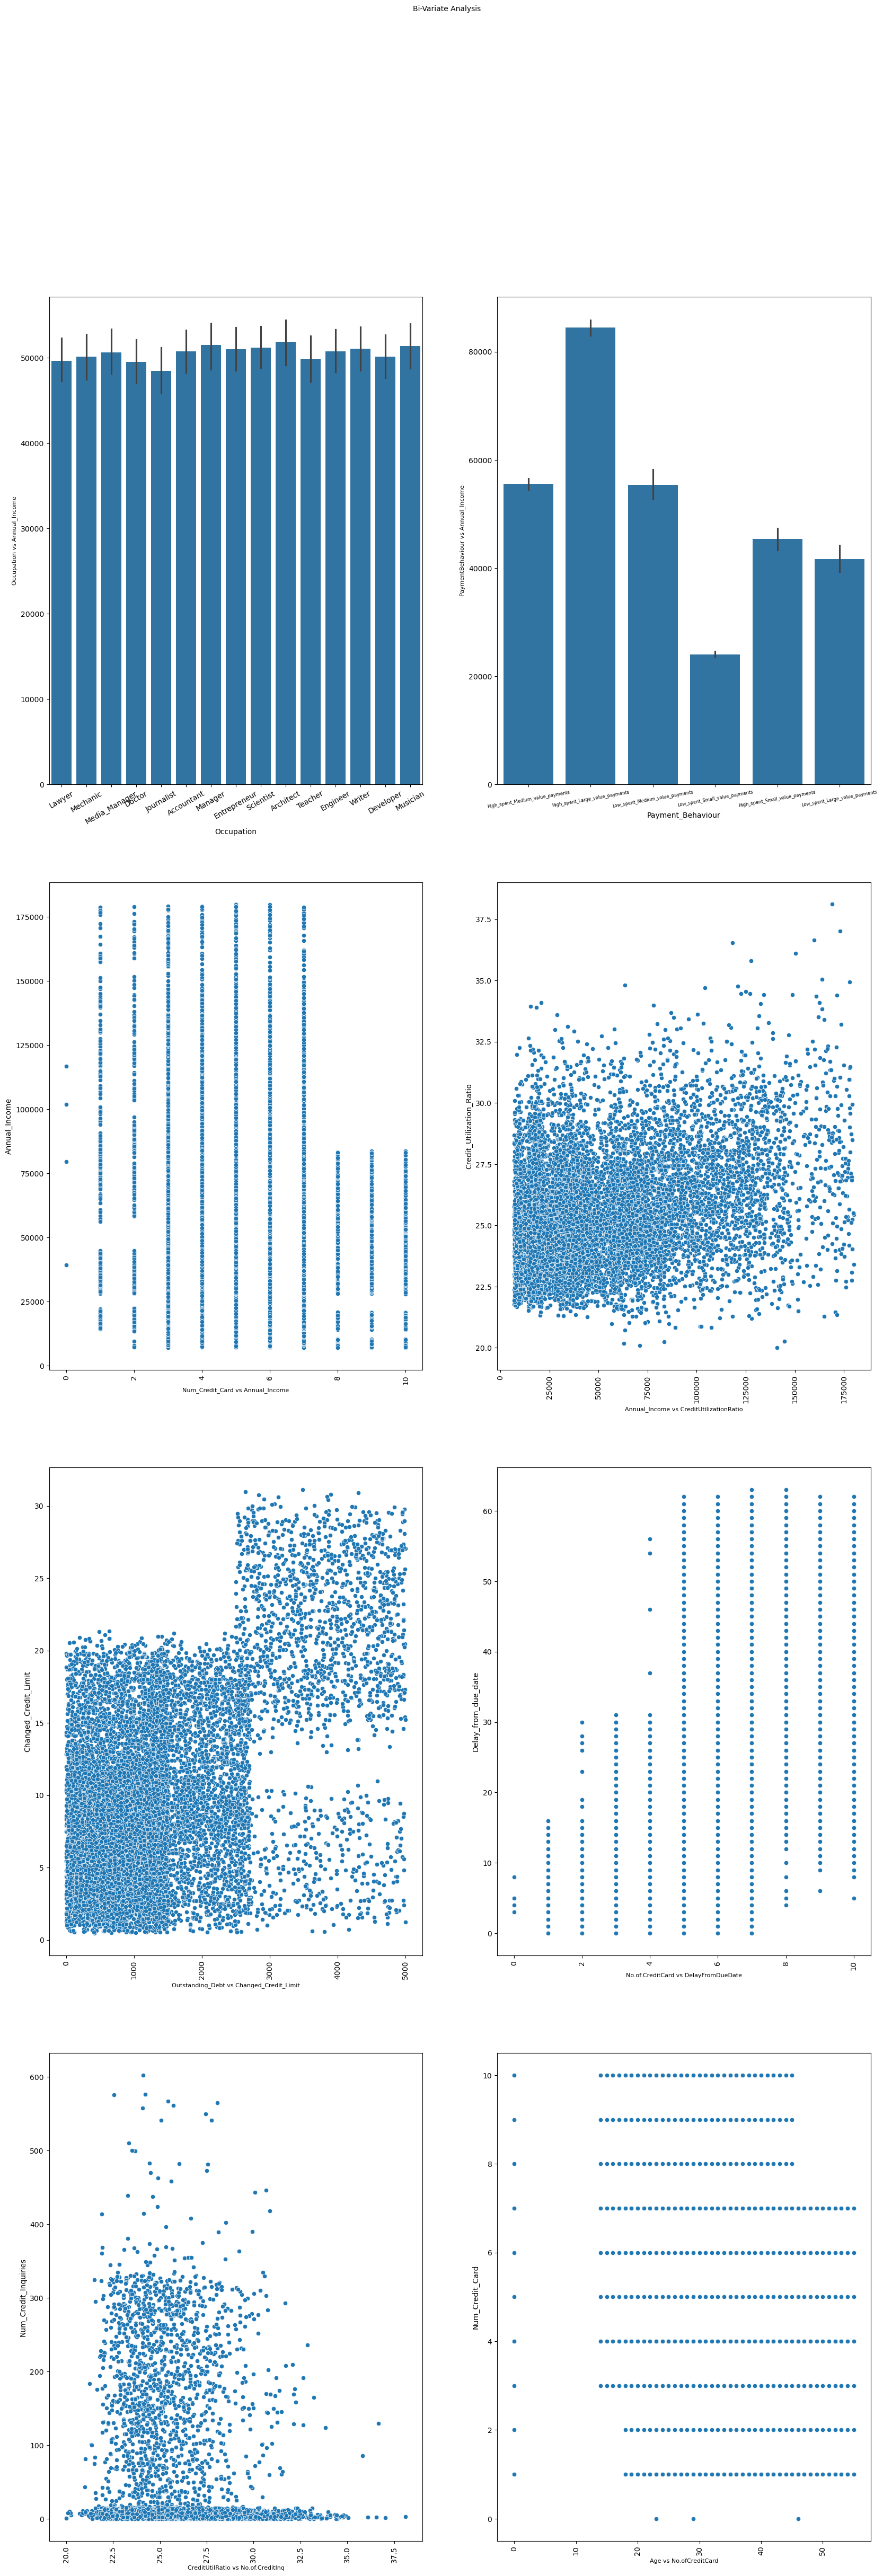

In [3122]:
plt.figure(figsize =(20,55)).suptitle("Bi-Variate Analysis",fontsize = 10)

plt.subplot(4,2,1)
sns.barplot(x = agg_df['Occupation'], y = agg_df['Annual_Income'])
plt.xticks(rotation =30,fontsize =10)
plt.ylabel('Occupation vs Annual_Income',fontsize =8)

plt.subplot(4,2,2)
sns.barplot(x = agg_df['Payment_Behaviour'], y = agg_df['Annual_Income'])
plt.xticks(rotation =10,fontsize =6)
plt.ylabel('PaymentBehaviour vs Annual_Income',fontsize =8)

plt.subplot(4,2,3)
sns.scatterplot(x = agg_df['Num_Credit_Card'],y = agg_df['Annual_Income'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('Num_Credit_Card vs Annual_Income',fontsize =8)

plt.subplot(4,2,4)
sns.scatterplot(x = agg_df['Annual_Income'],y = agg_df['Credit_Utilization_Ratio'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('Annual_Income vs CreditUtilizationRatio',fontsize =8)

plt.subplot(4,2,5)
sns.scatterplot(x = agg_df['Outstanding_Debt'], y = agg_df['Changed_Credit_Limit'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('Outstanding_Debt vs Changed_Credit_Limit',fontsize =8)

plt.subplot(4,2,6)
sns.scatterplot(x = agg_df['Num_Credit_Card'], y = agg_df['Delay_from_due_date'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('No.of.CreditCard vs DelayFromDueDate',fontsize =8)

plt.subplot(4,2,7)
sns.scatterplot(x = agg_df['Credit_Utilization_Ratio'], y = agg_df['Num_Credit_Inquiries'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('CreditUtilRatio vs No.of.CreditInq',fontsize =8)

plt.subplot(4,2,8)
sns.scatterplot(x = agg_df['Age'], y = agg_df['Num_Credit_Card'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('Age vs No.ofCreditCard',fontsize =8)







plt.show()

In [3034]:
agg_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

**Multivariate Analysis**

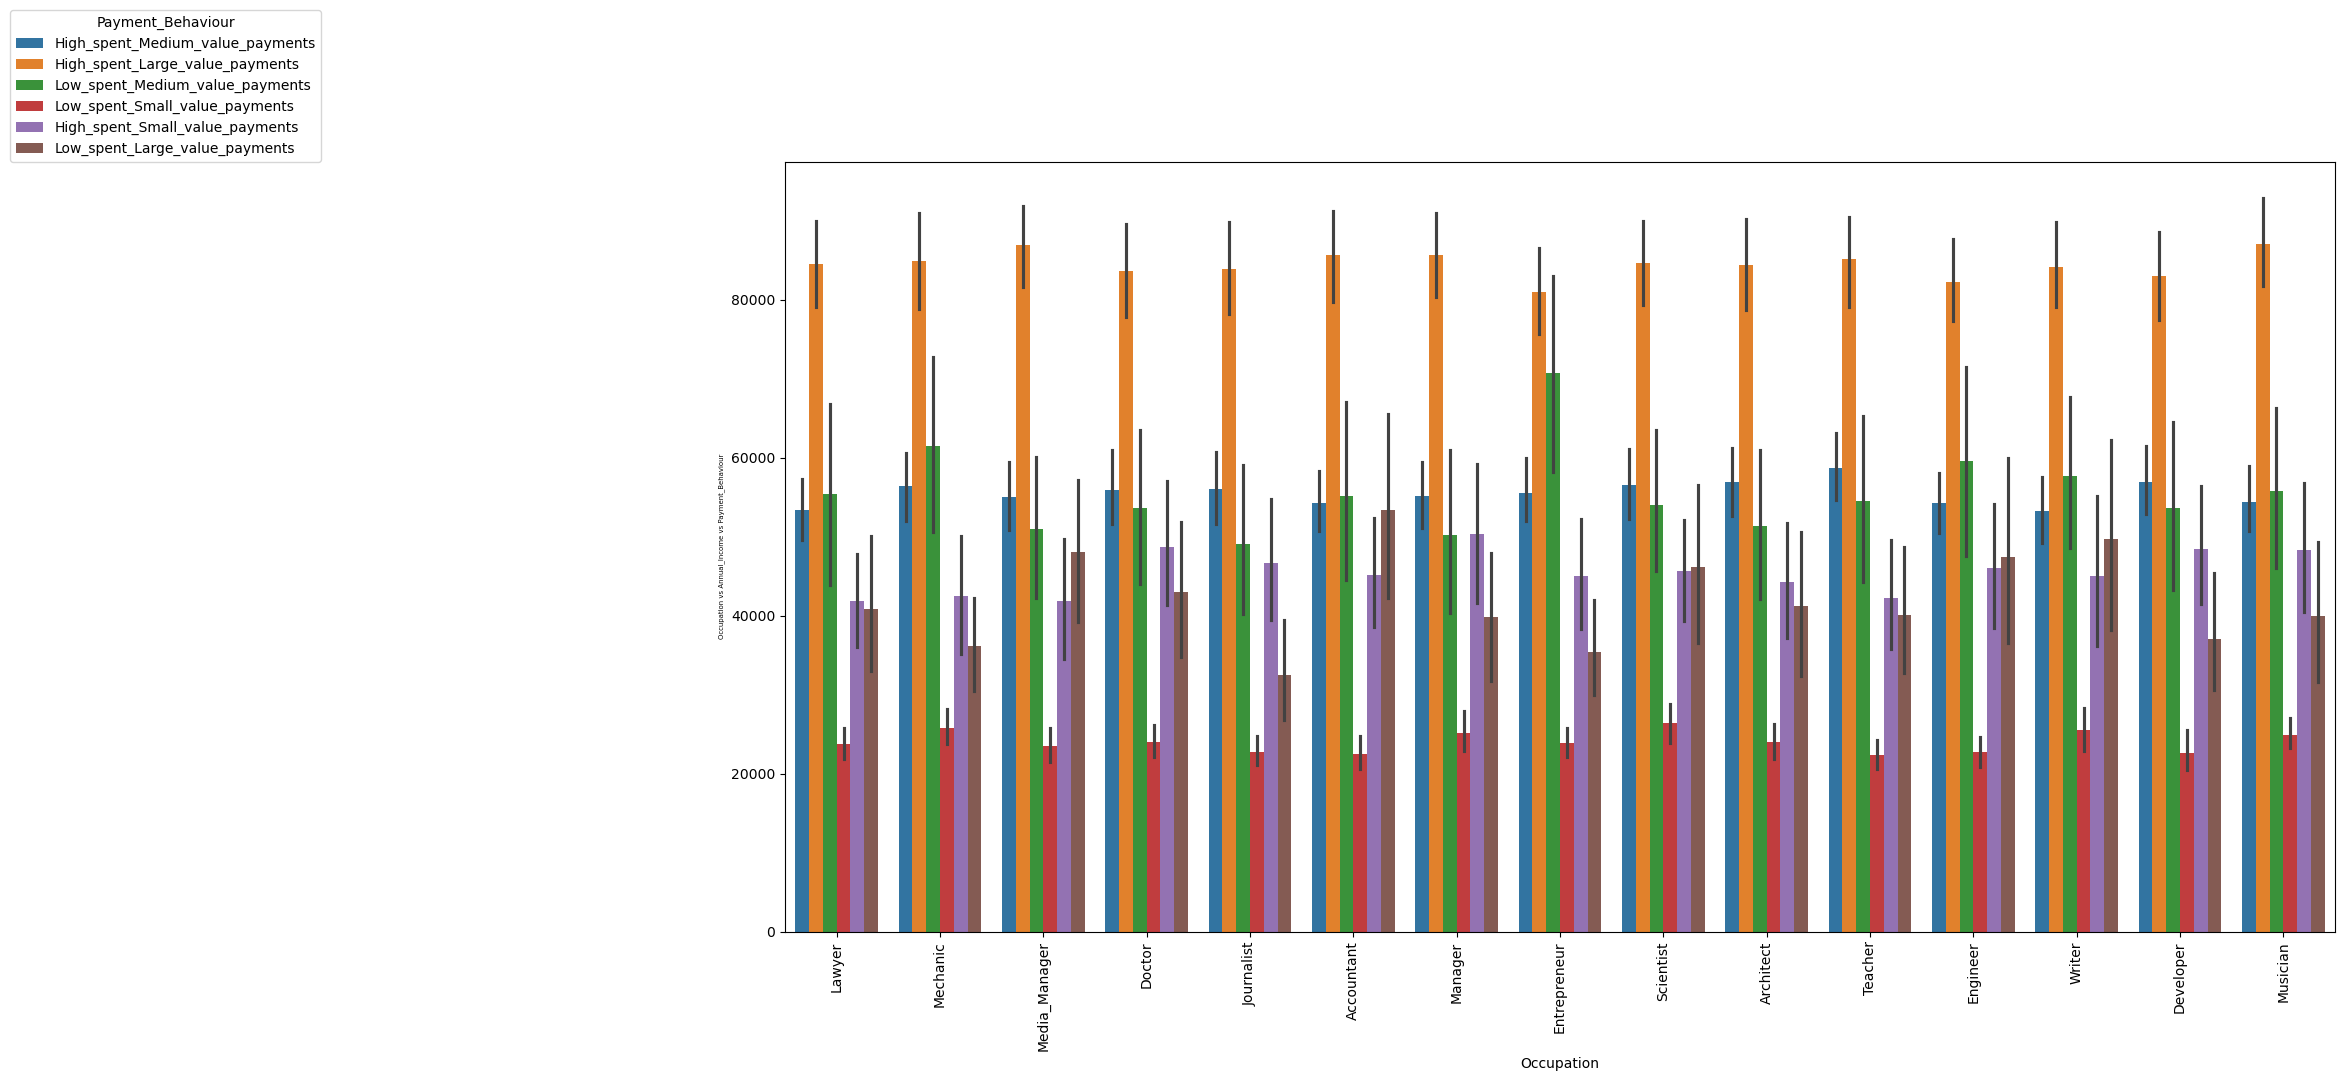

In [3036]:
plt.figure(figsize =(20,10))

plt.subplot(1,1,1)
sns.barplot(x = agg_df['Occupation'], y = agg_df['Annual_Income'],hue=agg_df['Payment_Behaviour'])
plt.xticks(rotation =90,fontsize =10)
plt.ylabel('Occupation vs Annual_Income vs Payment_Behaviour',fontsize =5)
plt.legend(loc = (-0.5,1),title='Payment_Behaviour')




plt.show()

**Insight**

We can see High spent large value is having higher proportion of customer in almost all the occupation types and we see that Low spent small payment and low spent medium payment is the second highest payment behavious among most of the occupation types

In [3037]:
agg_df['Type_of_Loan'].value_counts()

Type_of_Loan
missing value              1426
Credit-Builder Loan        1284
Student Loan               1280
Not Specified              1272
Payday Loan                1260
Debt Consolidation Loan    1226
Mortgage Loan              1212
Personal Loan              1190
Home Equity Loan           1178
Auto Loan                  1172
Name: count, dtype: int64

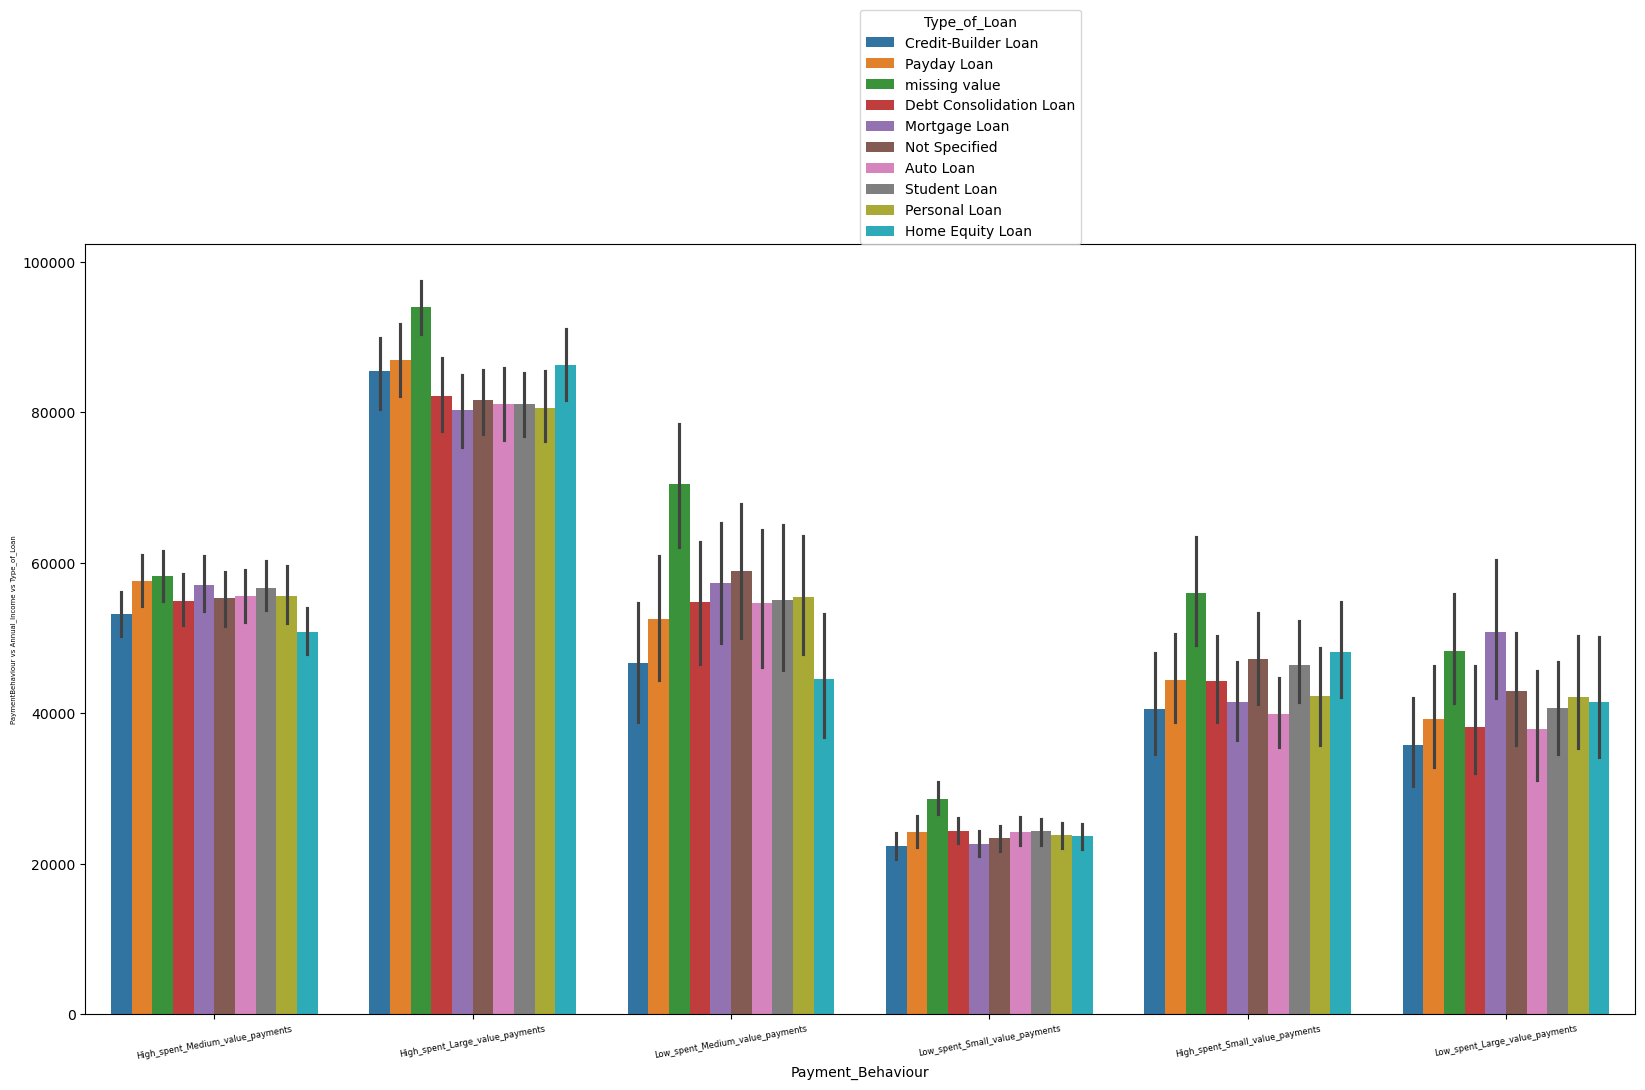

In [3038]:
plt.figure(figsize =(20,10))
plt.subplot(1,1,1)
sns.barplot(x = agg_df['Payment_Behaviour'], y = agg_df['Annual_Income'],hue = agg_df['Type_of_Loan'])
plt.xticks(rotation =10,fontsize =6)
plt.ylabel('PaymentBehaviour vs Annual_Income vs Type_of_Loan',fontsize =5)
plt.legend(loc = (0.5,1),title='Type_of_Loan')

plt.show()

**Insight**

--> High spent large payment customers are having highest annual income.

--> Also, these customers having highest proportion on loan types Home equity, Payday loan and credit builder loan

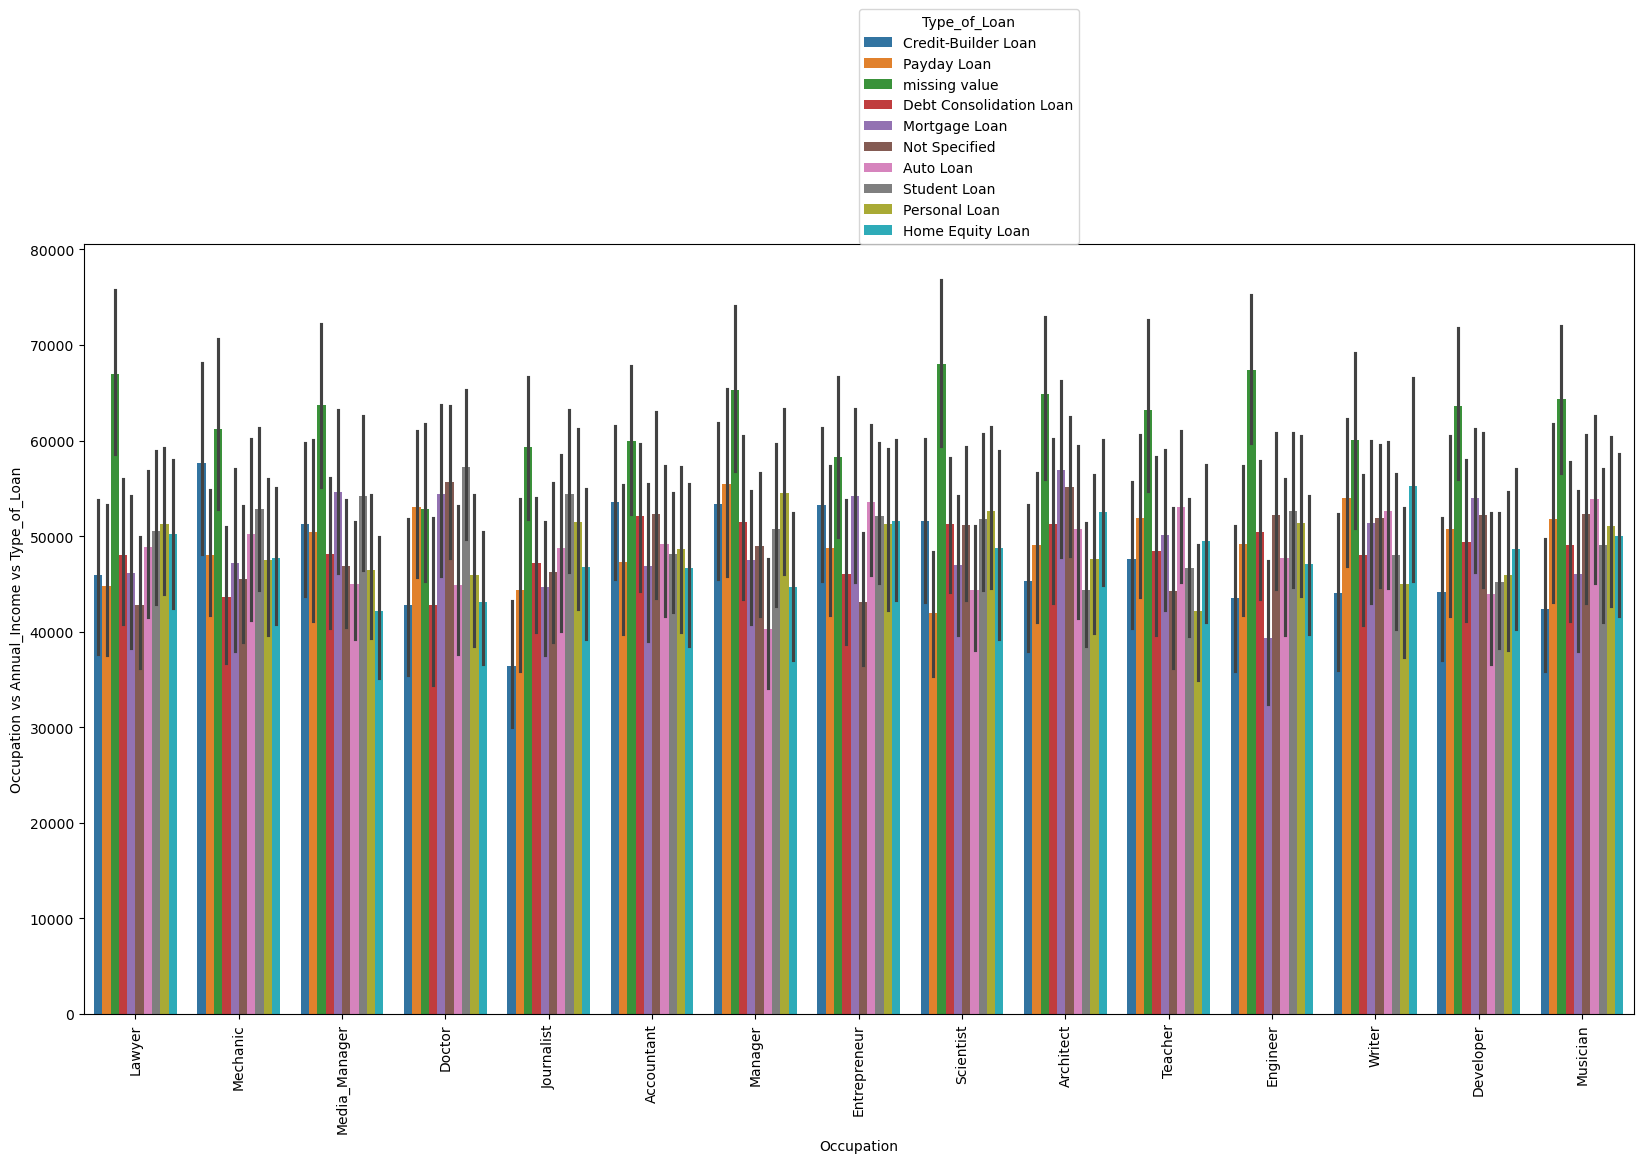

In [3039]:
plt.figure(figsize =(20,10))
plt.subplot(1,1,1)
sns.barplot(x = agg_df['Occupation'], y = agg_df['Annual_Income'],hue=agg_df['Type_of_Loan'])
plt.xticks(rotation =90,fontsize =10)
plt.ylabel('Occupation vs Annual_Income vs Type_of_Loan',fontsize =10)
plt.legend(loc = (0.5,1),title='Type_of_Loan').set_visible(True)

plt.show()

--> We can see customers from occupation Lawyer, Scientist,Engineer and Media manager having high income.

-->Personal loan, Mortagage and student loans are seen commonly prefered by large proprotion of customers across these occupation types.

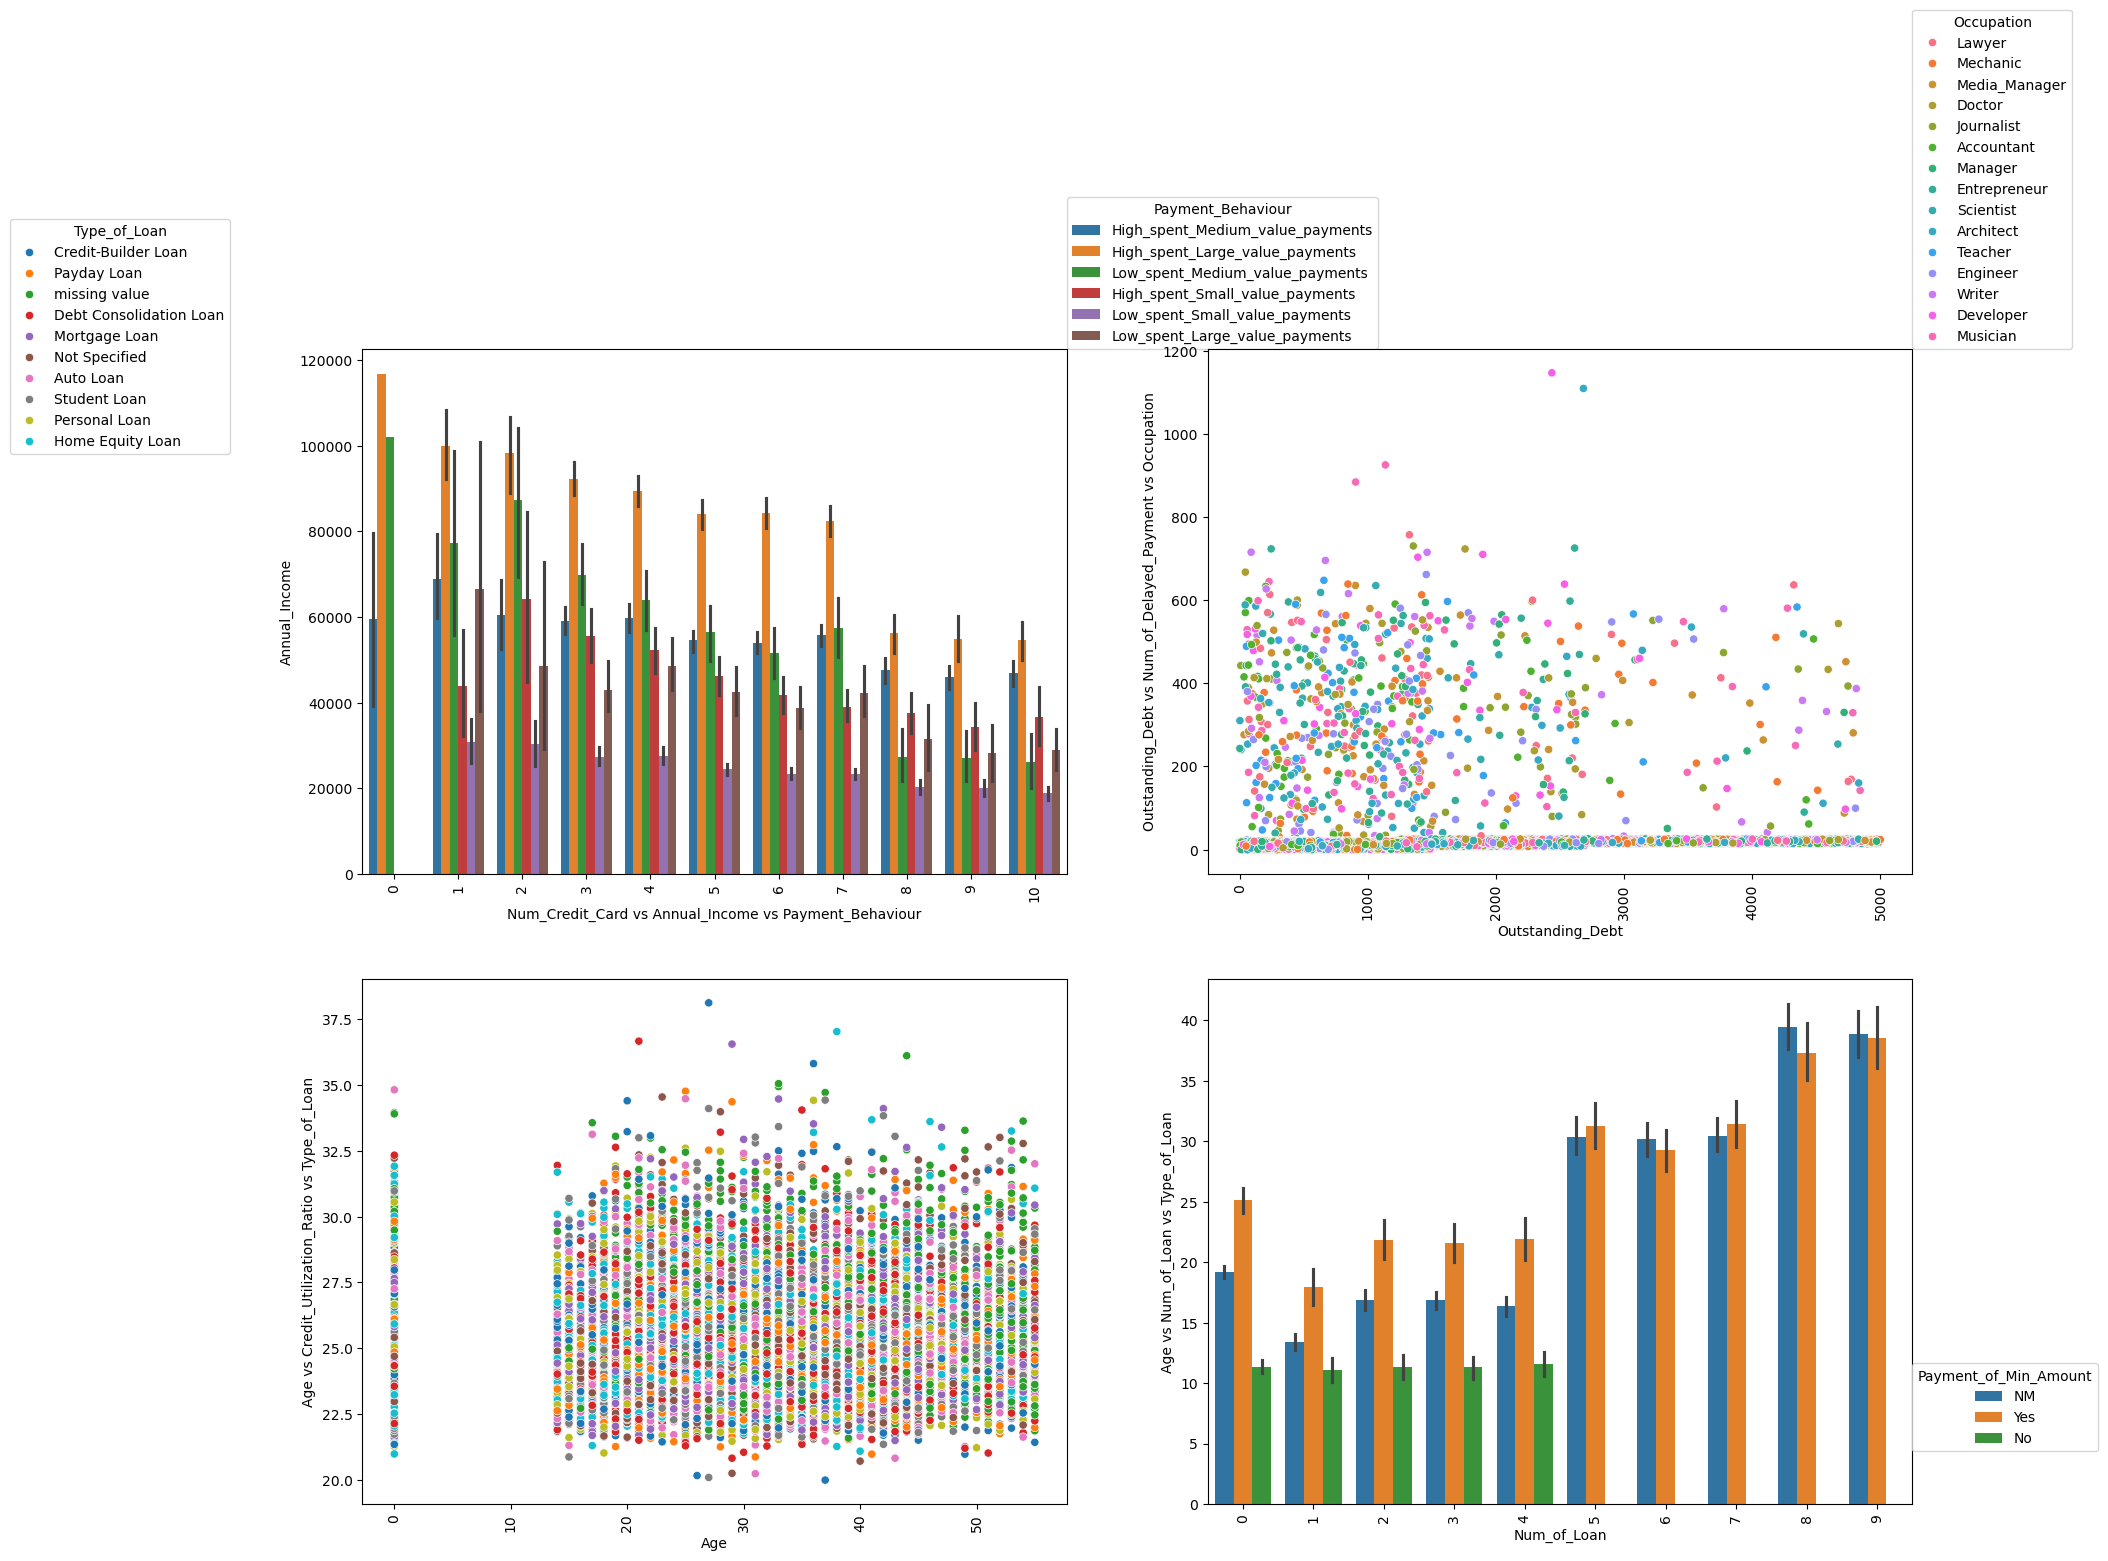

In [3040]:
plt.figure(figsize =(20,15))

plt.subplot(2,2,1)
sns.barplot(x = agg_df['Num_Credit_Card'],y = agg_df['Annual_Income'],hue=agg_df['Payment_Behaviour'])
plt.xticks(rotation =90,fontsize =10)
plt.xlabel('Num_Credit_Card vs Annual_Income vs Payment_Behaviour',fontsize =10)
plt.legend(loc = (1,1),title='Payment_Behaviour').set_visible(True)


plt.subplot(2,2,2)
sns.scatterplot(x = agg_df['Outstanding_Debt'], y = agg_df['Num_of_Delayed_Payment'],hue=agg_df['Occupation'])
plt.xticks(rotation =90,fontsize =10)
plt.ylabel('Outstanding_Debt vs Num_of_Delayed_Payment vs Occupation',fontsize =10)
plt.legend(loc = (1,1),title='Occupation').set_visible(True)


plt.subplot(2,2,3)
sns.scatterplot(x = agg_df['Age'], y = agg_df['Credit_Utilization_Ratio'],hue=agg_df['Type_of_Loan'])
plt.xticks(rotation =90,fontsize =10)
plt.ylabel('Age vs Credit_Utilization_Ratio vs Type_of_Loan',fontsize =10)
plt.legend(loc = (-0.5,2),title='Type_of_Loan').set_visible(True)

plt.subplot(2,2,4)
sns.barplot(x = agg_df['Num_of_Loan'], y = agg_df['Delay_from_due_date'],hue=agg_df['Payment_of_Min_Amount'])
plt.xticks(rotation =90,fontsize =10)
plt.ylabel('Age vs Num_of_Loan vs Type_of_Loan',fontsize =10)
plt.legend(loc = (1,0.1),title='Payment_of_Min_Amount').set_visible(True)


plt.show()

In [3041]:
agg_df['Type_of_Loan'].value_counts()

Type_of_Loan
missing value              1426
Credit-Builder Loan        1284
Student Loan               1280
Not Specified              1272
Payday Loan                1260
Debt Consolidation Loan    1226
Mortgage Loan              1212
Personal Loan              1190
Home Equity Loan           1178
Auto Loan                  1172
Name: count, dtype: int64

In [3042]:
agg_df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

**Credit Score Calculation**

In [3044]:
def creditMix_Percent(Credit_Mix):
    if Credit_Mix == 'Standard':
        return 850*0.07
    elif Credit_Mix == 'Good':
        return 850*0.1
    else:
        return 850*0.03

Insight: 
    -->Credit Mix percent is calculated based on 3 categories. For Standard 7%, Good 10% and Bad 3% is used

In [3046]:
df['CreditMix_Percent']=df['Credit_Mix'].apply(creditMix_Percent)

In [3047]:
df['CreditMix_Percent'].value_counts()

CreditMix_Percent
59.5    45658
85.0    30454
25.5    23888
Name: count, dtype: int64

In [3048]:
def Payment_History_percent(Payment_Behaviour):
    if Payment_Behaviour == 'Low_spent_Small_value_payments':
        return 850*0.12
    elif Payment_Behaviour == 'High_spent_Medium_value_payments':
        return 850*0.15
    elif Payment_Behaviour == 'Low_spent_Medium_value_payments':
        return 850*0.20
    elif Payment_Behaviour == 'High_spent_Large_value_payments':
        return 850*0.30
    elif Payment_Behaviour == 'High_spent_Small_value_payments':
        return 850*0.10
    else:
        return 850*0.25

Insights: 
    --> LowSpent small value gets 12%, High spent Medium is assigned 15%, Low spent Medium gets 20%, 
        High spent Large gets 30%, High spent small gets 10% and Low spent Large gets 25%.

**Percentage used here is based on percentage used in credit score calculations**

In [3051]:
df['Payment_History_percent'] = df['Payment_Behaviour'].apply(Payment_History_percent)

In [3052]:
df['Payment_History_percent'].value_counts()

Payment_History_percent
102.0    30880
127.5    24688
255.0    21808
170.0     9088
85.0      7776
212.5     5760
Name: count, dtype: int64

In [3053]:
def Credit_Age_Percent(Credit_History_Age):
    if Credit_History_Age > 20:
        return 850*0.15
    elif Credit_History_Age < 20 and Credit_History_Age > 10:
        return 850*0.10
    else:
        return 850*0.05

Insights: 
    -->Credit history greater that 20 gets 15%, less tha 20 and greater than 10 gets 10% and other gets 5%

In [3055]:
df['CH_list'] = df['Credit_History_Age'].str.split(' ')

In [3056]:
df['credit_Age'] = df['CH_list'].apply(lambda x: x[0]).astype(int)

In [3057]:
df['CreditAgePercent'] = df['credit_Age'].apply(Credit_Age_Percent)

In [3058]:
df['CreditAgePercent'].value_counts()

CreditAgePercent
85.0     37600
127.5    36760
42.5     25640
Name: count, dtype: int64

In [3059]:
def credit_Inquiry(Num_Credit_Inquiries):
    if Num_Credit_Inquiries < 5:
        return 850*0.1
    elif Num_Credit_Inquiries > 5 and Num_Credit_Inquiries < 25:
        return 850*0.05
    else:
        return 850*0.02

Insights: 
    -->Credit Inquiries get 10% if <5, 
    
    -->gets 5% if >5 and <25 
    
    -->if > 25 get 2%
    

In [3061]:
df['Credit_Inquiry_Percent'] = df['Num_Credit_Inquiries'].apply(credit_Inquiry)

In [3062]:
df['Credit_Inquiry_Percent'].value_counts()

Credit_Inquiry_Percent
42.5    45000
85.0    41152
17.0    13848
Name: count, dtype: int64

In [3063]:
def calc_CreditUtilPercent(dfs):
  if dfs >30:
    return 850*0.1
  elif dfs >=25 and dfs <=30:
    return 850*0.2
  elif dfs <25:
    return 850*0.3

In [3064]:
df['Credit_util_percent'] = df['Credit_Utilization_Ratio'].apply(calc_CreditUtilPercent)

In [3065]:
df['Credit_util_percent'].value_counts()

Credit_util_percent
85.0     63638
170.0    28056
255.0     8306
Name: count, dtype: int64

In [3066]:
df['Credit_Score'] = df['Credit_Inquiry_Percent']+df['CreditAgePercent']+df['Payment_History_percent']+df['CreditMix_Percent']+df['Credit_util_percent']

<Axes: ylabel='Density'>

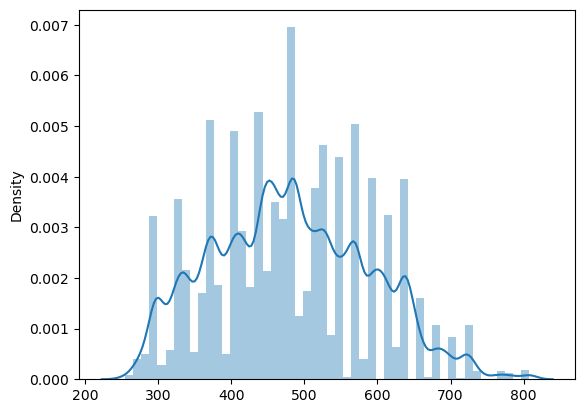

In [3067]:
sns.distplot(x= df['Credit_Score'],kde=True)

In [3134]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'CreditMix_Percent', 'Payment_History_percent', 'CH_list', 'credit_Age',
       'CreditAgePercent', 'Credit_Inquiry_Percent', 'Credit_util_percent',
       'Credit_Score'],
      dtype='object')

In [3152]:
cs = df[['Customer_ID','Month','Num_Credit_Card','Num_of_Loan','Amount_invested_monthly','Credit_Score']]

In [3154]:
cs.head(10)

,Customer_ID,Month,Num_Credit_Card,Num_of_Loan,Amount_invested_monthly,Credit_Score
0,CUS_0xd40,January,4,4,98.36,595.0
1,CUS_0xd40,February,4,4,98.36,510.0
2,CUS_0xd40,March,4,4,98.36,595.0
3,CUS_0xd40,April,4,4,98.36,510.0
4,CUS_0xd40,May,4,4,98.36,680.0
5,CUS_0xd40,June,4,4,98.36,595.0
6,CUS_0xd40,July,4,4,98.36,680.0
7,CUS_0xd40,August,4,4,98.36,680.0
8,CUS_0x21b1,January,4,1,95.64,807.5
9,CUS_0x21b1,February,4,1,95.64,637.5


In [3170]:
df['Num_of_Loan'].max()

1496

In [3156]:
three_month = cs[cs['Month'].isin(['March','April','May'])]

In [3158]:
three_month

,Customer_ID,Month,Num_Credit_Card,Num_of_Loan,Amount_invested_monthly,Credit_Score
2,CUS_0xd40,March,4,4,98.36,595.0
3,CUS_0xd40,April,4,4,98.36,510.0
4,CUS_0xd40,May,4,4,98.36,680.0
10,CUS_0x21b1,March,1385,1,95.64,637.5
11,CUS_0x21b1,April,4,1,95.64,637.5
...,...,...,...,...,...,...
99987,CUS_0x8600,April,8,0,100.99,450.5
99988,CUS_0x8600,May,8,5,100.99,535.5
99994,CUS_0x942c,March,6,2,160.07,637.5
99995,CUS_0x942c,April,6,2,160.07,637.5


In [3160]:
mar_apr_may = three_month.groupby('Customer_ID')['Credit_Score'].mean()

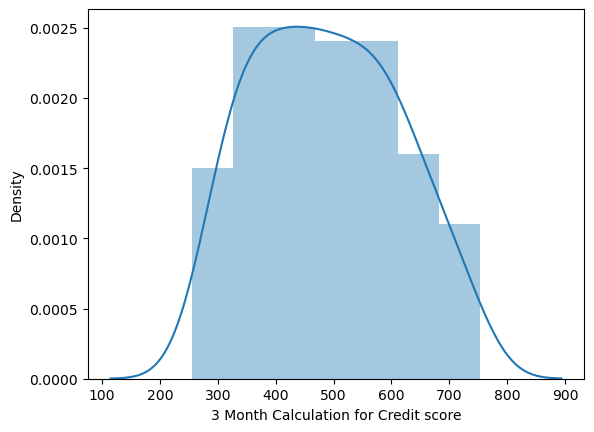

In [3162]:
sns.distplot(x= mar_apr_may.value_counts().index,kde=True)
plt.xlabel("3 Month Calculation for Credit score",fontsize=10)
plt.show()

In [3164]:
six_month = cs[cs['Month'].isin(['January','February','March','April','May','June'])]

In [3166]:
JanToJune = six_month.groupby('Customer_ID')['Credit_Score'].mean()

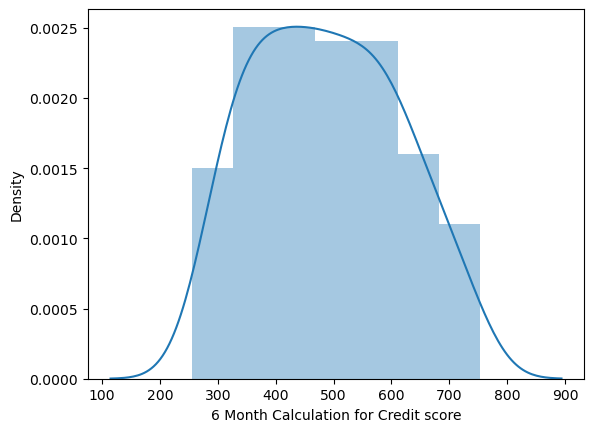

In [3168]:
sns.distplot(x= mar_apr_may.value_counts().index,kde=True)
plt.xlabel("6 Month Calculation for Credit score",fontsize=10)
plt.show()

Insights:

--> Between entire month credit score calculation and three/six month calculation we can see some difference in distribution of score.

--> Data falls between 250 - 750 in 3/6 month calculations whereas in complete data we can see credit scores exceeds above 750.